# Exercise 2
## Dataset: Housing prices

### Import libriaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

### Load data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Basic data exploration

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
categorical_columns = df_train.select_dtypes(include=['object', 'category'])
numeric_columns = df_train.select_dtypes(include=['number'])

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns.columns)

Categorical columns:      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     N

### Checking for missing values

In [6]:
numeric_columns.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [7]:
categorical_columns.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [8]:
for col in categorical_columns:
    print(f"{col}: {df_train[col].nunique()} unique value")

MSZoning: 5 unique value
Street: 2 unique value
Alley: 2 unique value
LotShape: 4 unique value
LandContour: 4 unique value
Utilities: 2 unique value
LotConfig: 5 unique value
LandSlope: 3 unique value
Neighborhood: 25 unique value
Condition1: 9 unique value
Condition2: 8 unique value
BldgType: 5 unique value
HouseStyle: 8 unique value
RoofStyle: 6 unique value
RoofMatl: 8 unique value
Exterior1st: 15 unique value
Exterior2nd: 16 unique value
MasVnrType: 3 unique value
ExterQual: 4 unique value
ExterCond: 5 unique value
Foundation: 6 unique value
BsmtQual: 4 unique value
BsmtCond: 4 unique value
BsmtExposure: 4 unique value
BsmtFinType1: 6 unique value
BsmtFinType2: 6 unique value
Heating: 6 unique value
HeatingQC: 5 unique value
CentralAir: 2 unique value
Electrical: 5 unique value
KitchenQual: 4 unique value
Functional: 7 unique value
FireplaceQu: 5 unique value
GarageType: 6 unique value
GarageFinish: 3 unique value
GarageQual: 5 unique value
GarageCond: 5 unique value
PavedDrive: 3 

In [9]:
for col in categorical_columns:
    print(f"Values in '{col}':")
    print(df_train[col].value_counts())
    print("\n")

Values in 'MSZoning':
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64


Values in 'Street':
Street
Pave    1454
Grvl       6
Name: count, dtype: int64


Values in 'Alley':
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


Values in 'LotShape':
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64


Values in 'LandContour':
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


Values in 'Utilities':
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64


Values in 'LotConfig':
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64


Values in 'LandSlope':
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64


Values in 'Neighborhood':
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
N

Rare values ​​in these variables can be a problem when splitting the data into train and validation. If validation contains a value that only appears once and is not in train, then for Label Encoding the transform method will throw an error because LabelEncoder does not know how to handle an unknown category. For One-Hot Encoding an unknown value will not be represented in the encoded format, which may result in a column mismatch between train and validation.

We can replace rare categories with a more general class, such as "Other", to ensure that such categories do not cause problems when splitting. We also replace missing values in categorical data with "Other". But we still have only one row with the value "Other" in Utilities, so we will remove it.

In [10]:
for col in categorical_columns:
    value_counts = df_train[col].value_counts()
    
    rare_values = value_counts[value_counts < 50]
    
    if not rare_values.empty:
        print(f"Variable '{col}' has values, which occur less than 50 times:")
        print(rare_values)
        print("\n")

Variable 'MSZoning' has values, which occur less than 50 times:
MSZoning
RH         16
C (all)    10
Name: count, dtype: int64


Variable 'Street' has values, which occur less than 50 times:
Street
Grvl    6
Name: count, dtype: int64


Variable 'Alley' has values, which occur less than 50 times:
Alley
Pave    41
Name: count, dtype: int64


Variable 'LotShape' has values, which occur less than 50 times:
LotShape
IR2    41
IR3    10
Name: count, dtype: int64


Variable 'LandContour' has values, which occur less than 50 times:
LandContour
Low    36
Name: count, dtype: int64


Variable 'Utilities' has values, which occur less than 50 times:
Utilities
NoSeWa    1
Name: count, dtype: int64


Variable 'LotConfig' has values, which occur less than 50 times:
LotConfig
FR2    47
FR3     4
Name: count, dtype: int64


Variable 'LandSlope' has values, which occur less than 50 times:
LandSlope
Sev    13
Name: count, dtype: int64


Variable 'Neighborhood' has values, which occur less than 50 times:
N

In [11]:
for col in categorical_columns:
    value_counts = df_train[col].value_counts()
    rare_categories = value_counts[value_counts < 50].index
    df_train[col] = df_train[col].replace(rare_categories, 'Other')

for col in categorical_columns:
    df_train[col] = df_train[col].fillna('Other')

In [12]:
# Remove one row where variable 'Utilities' equals 'Other'
df_train = df_train[df_train['Utilities'] != 'Other']

### Checking for outliers

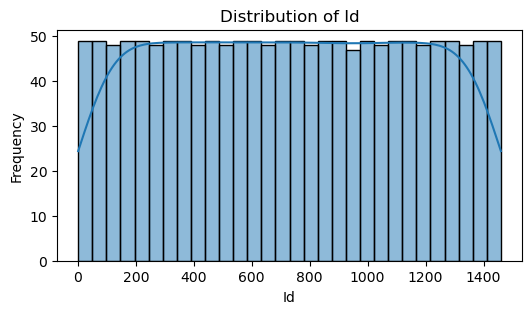

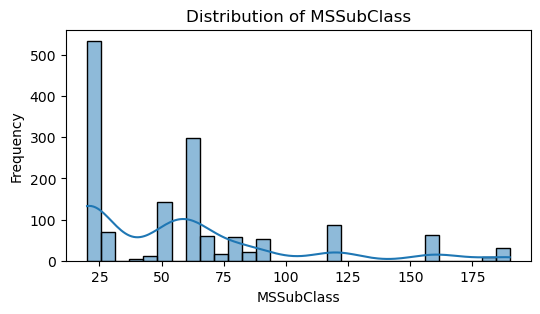

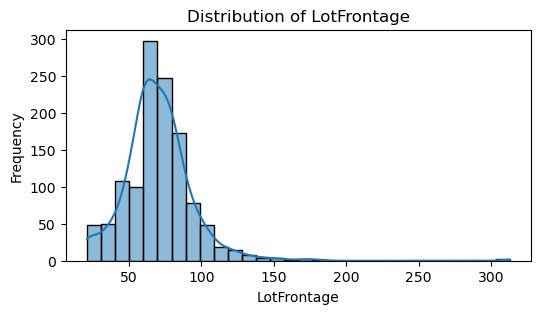

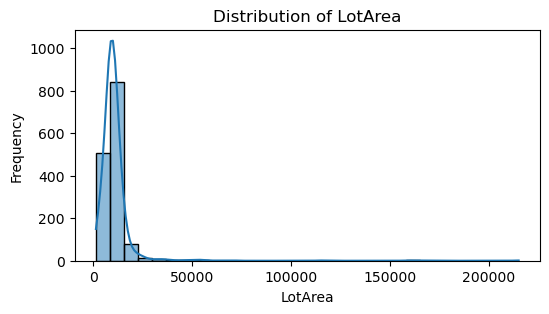

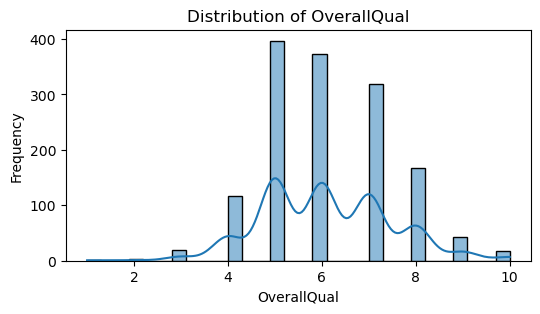

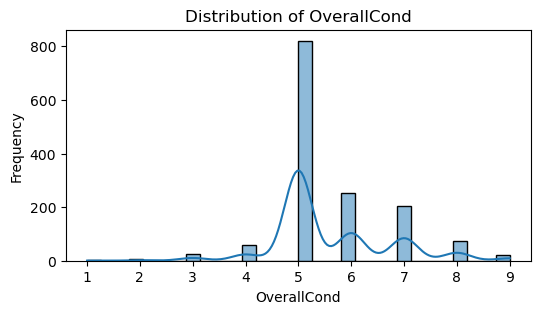

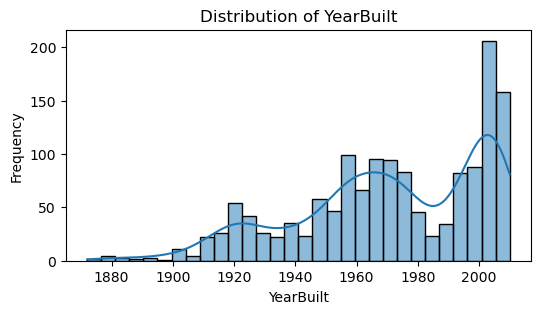

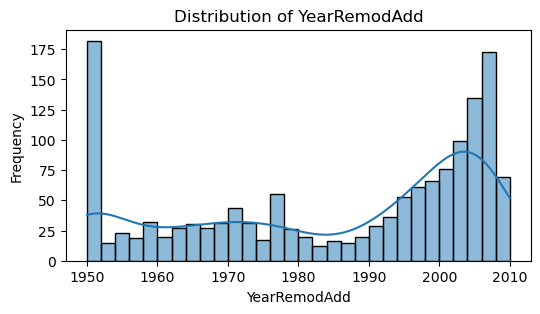

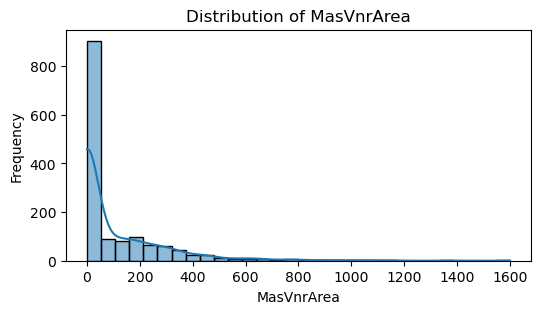

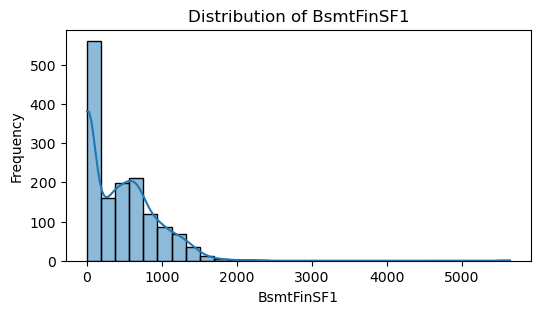

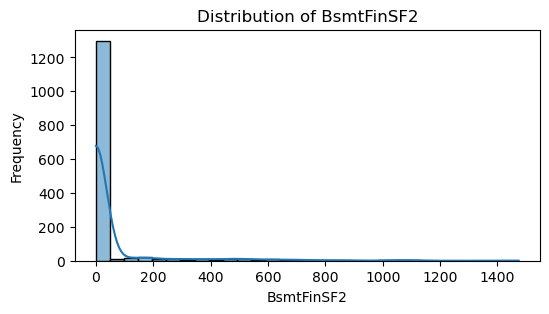

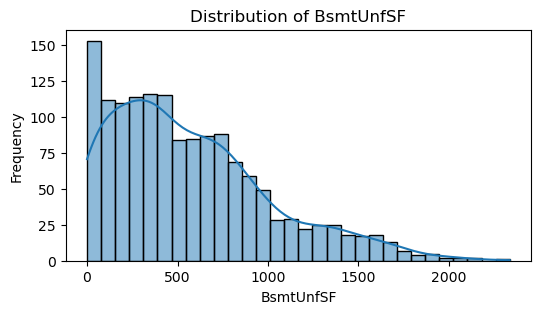

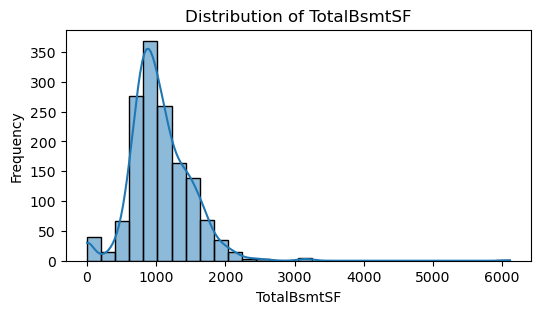

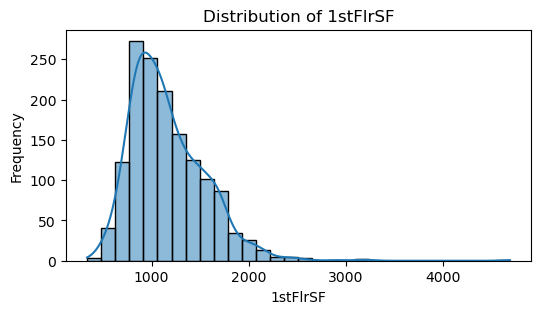

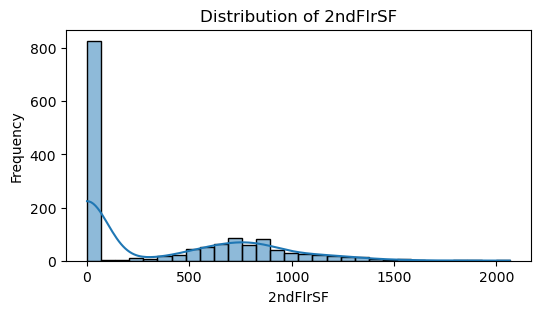

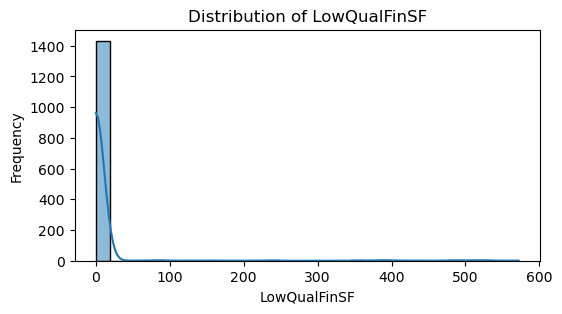

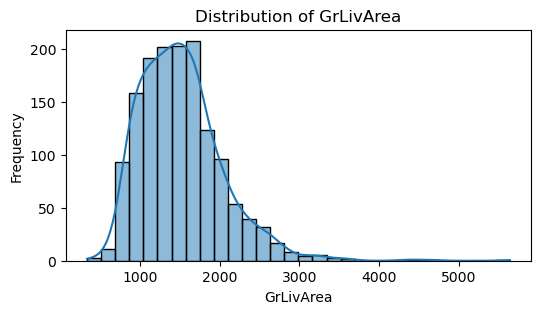

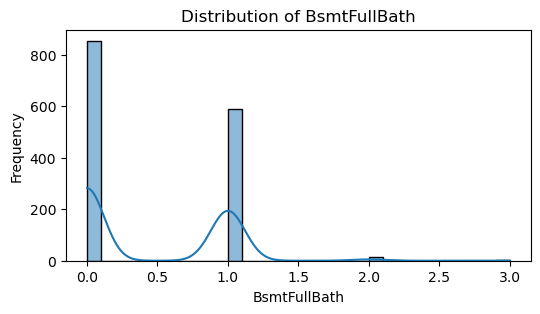

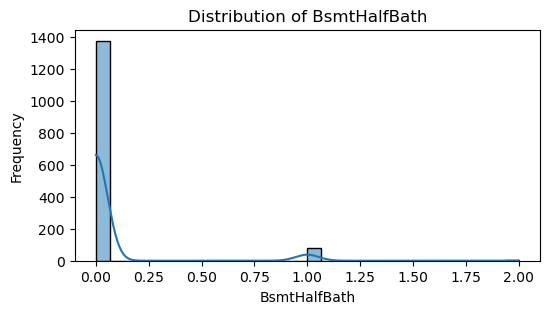

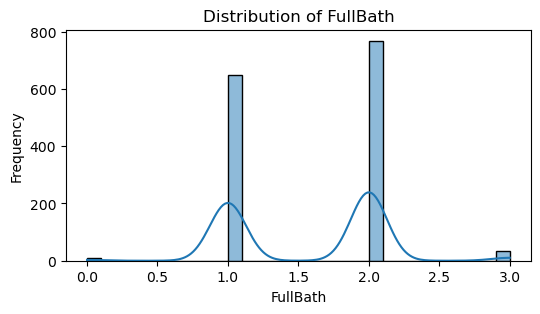

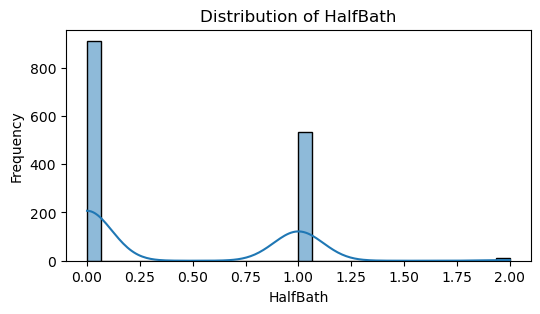

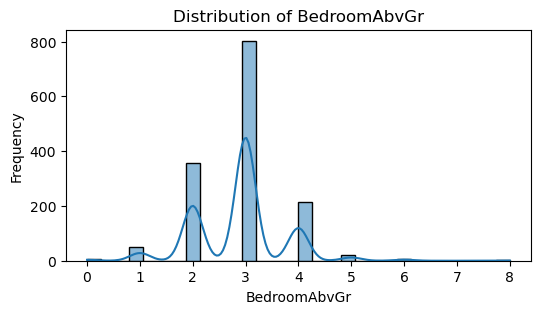

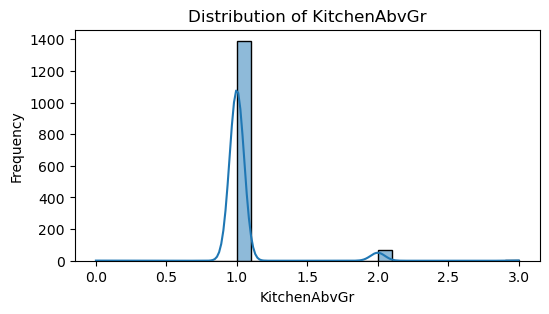

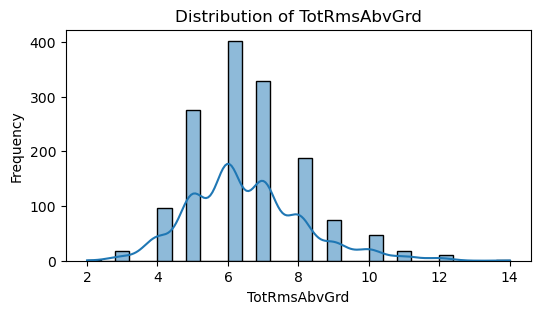

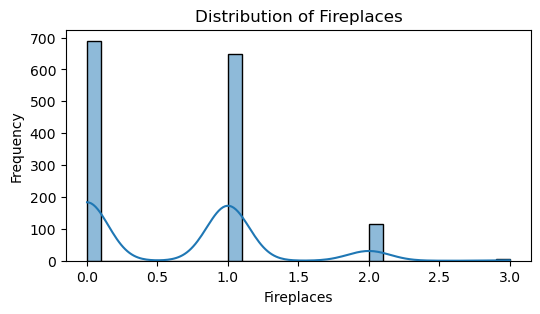

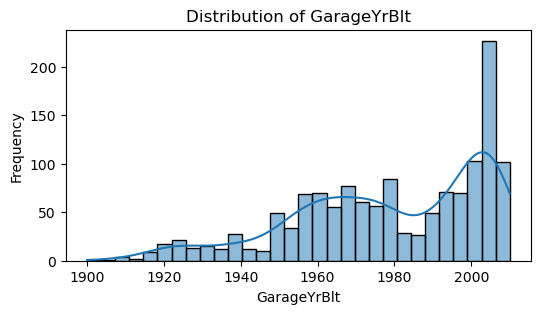

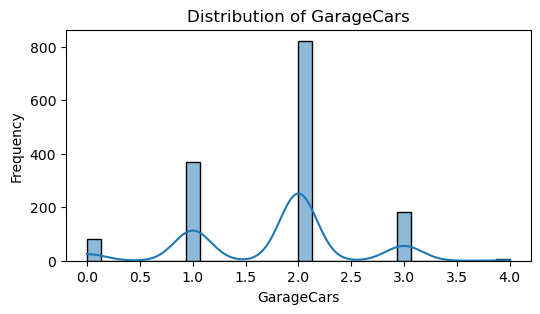

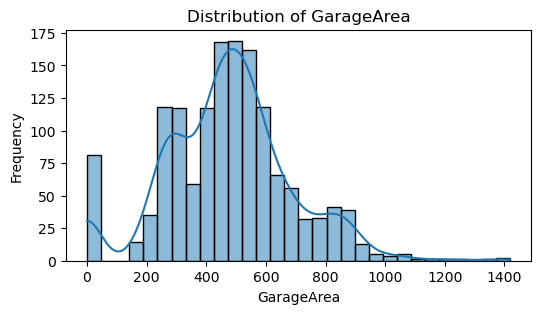

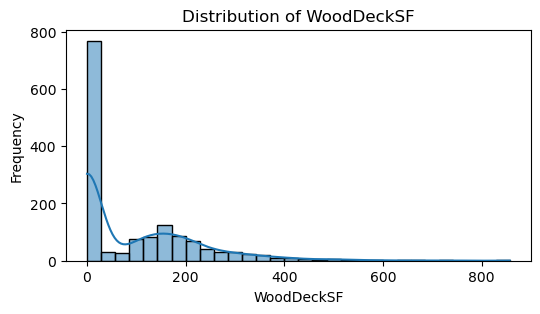

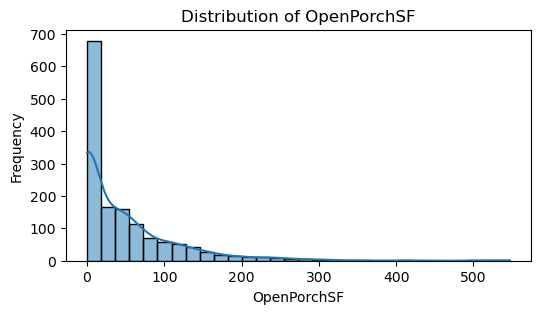

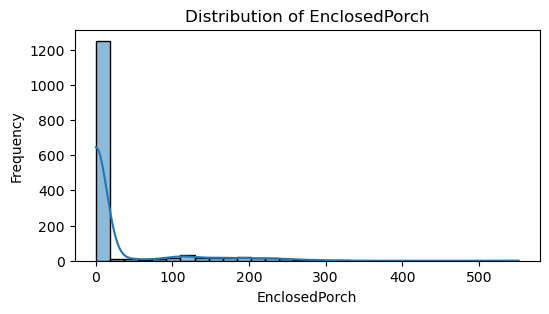

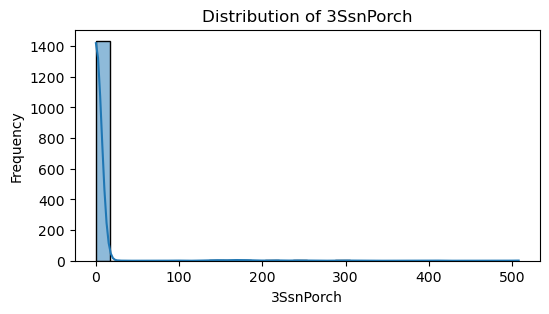

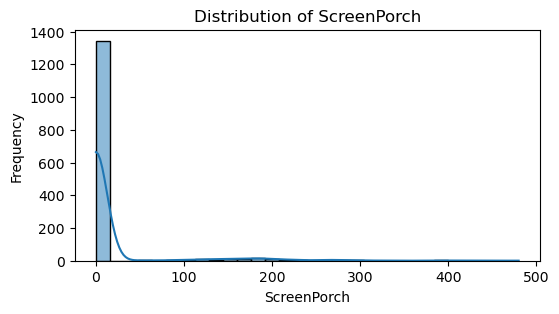

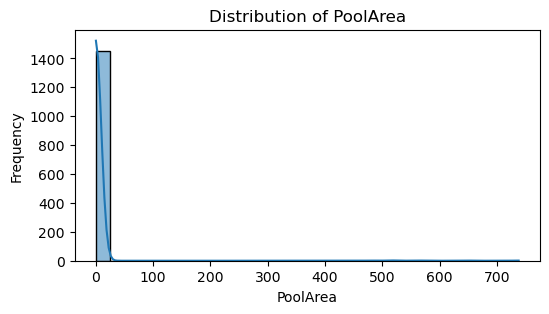

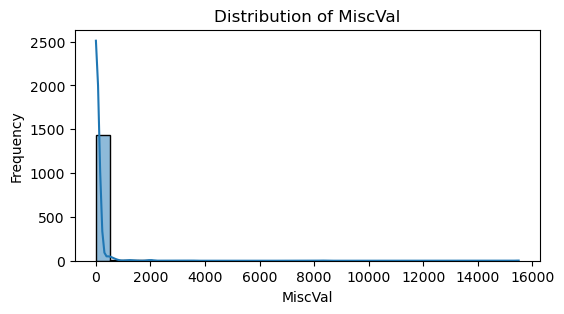

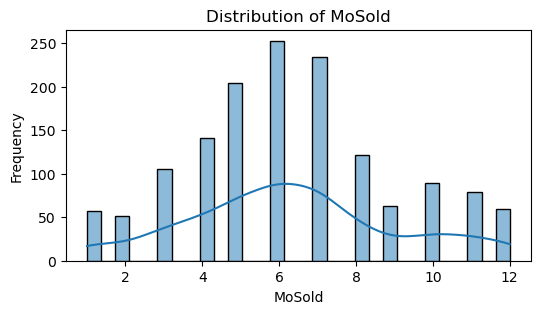

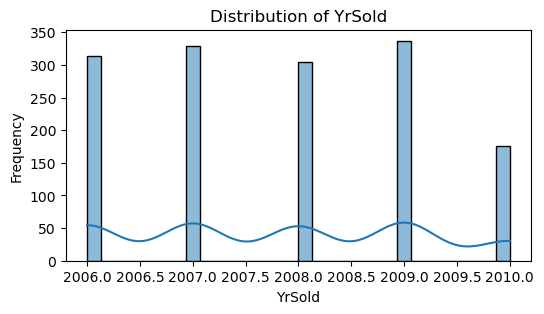

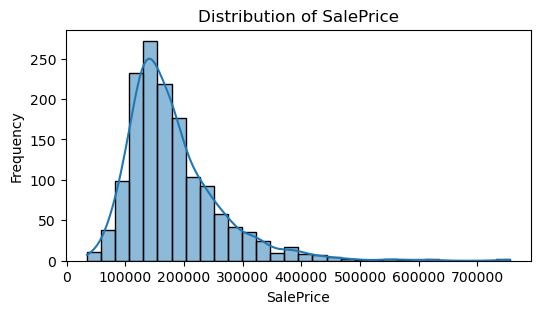

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_train[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

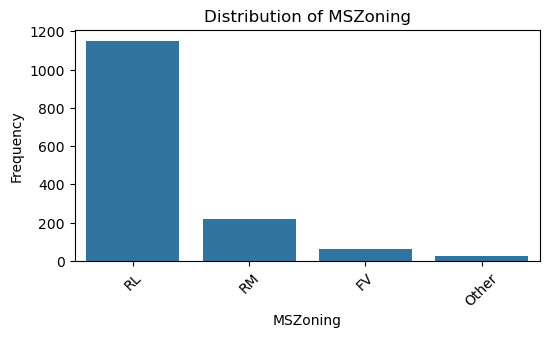

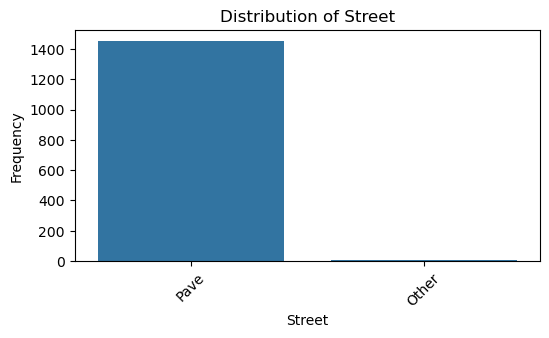

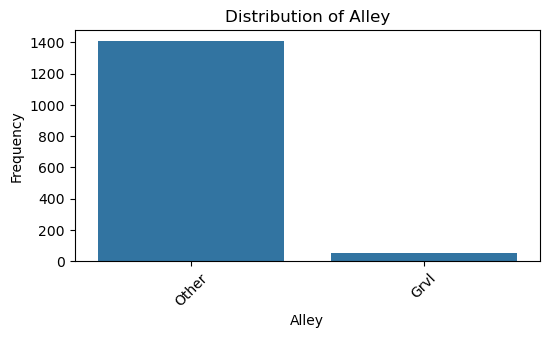

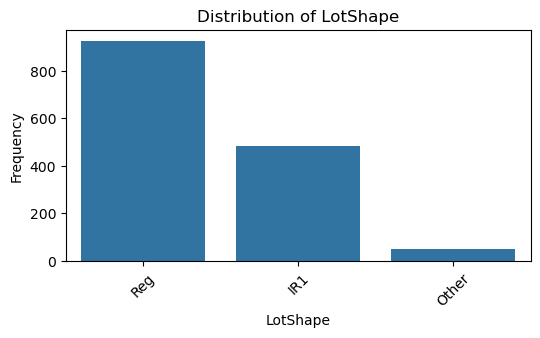

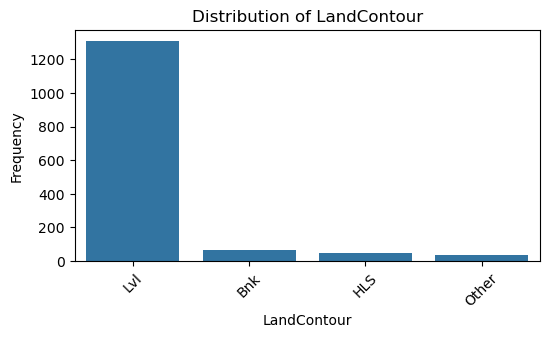

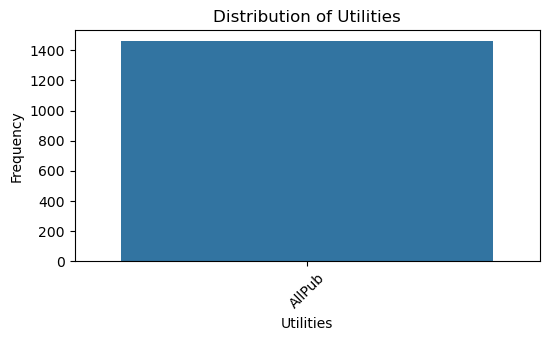

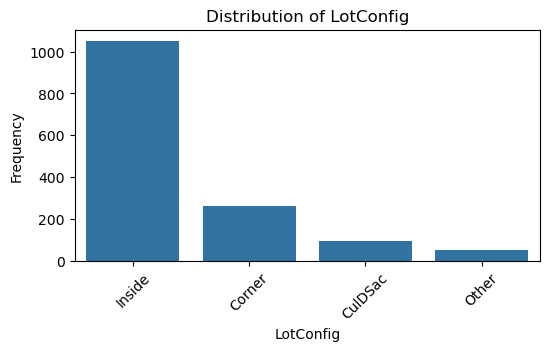

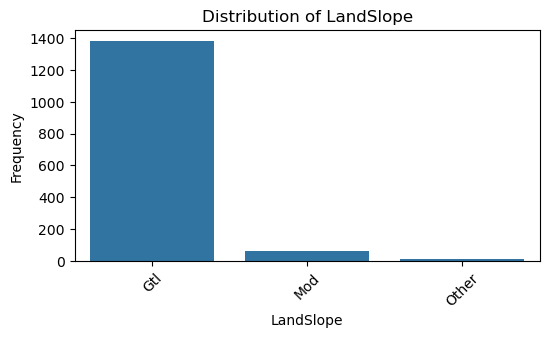

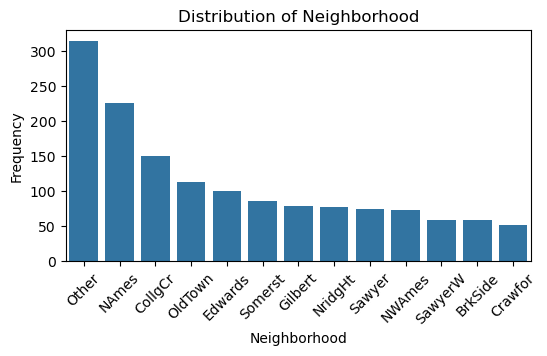

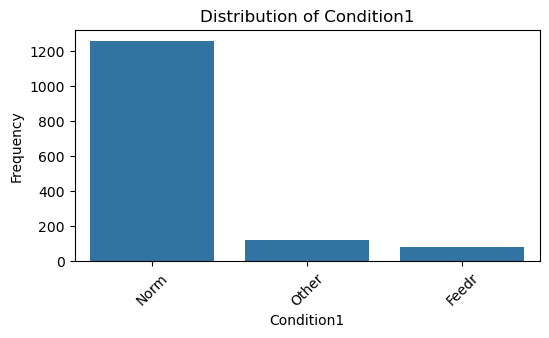

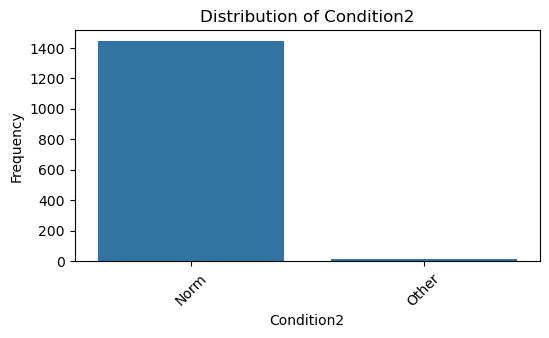

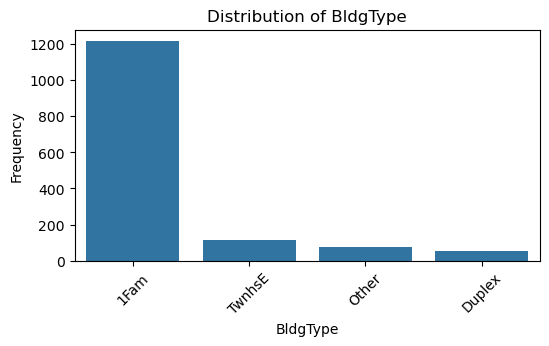

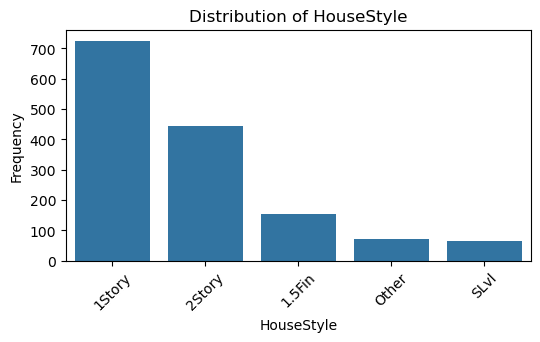

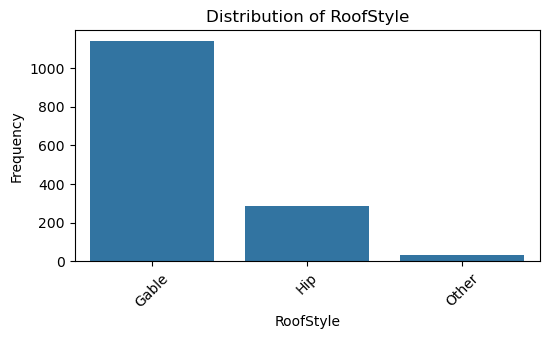

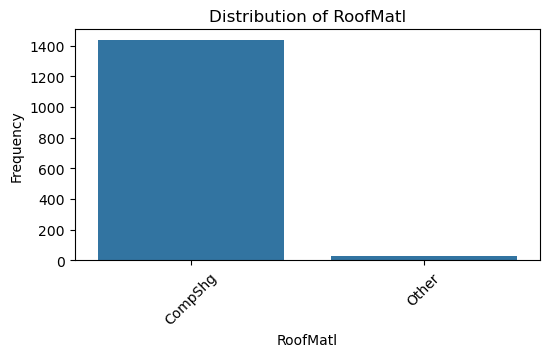

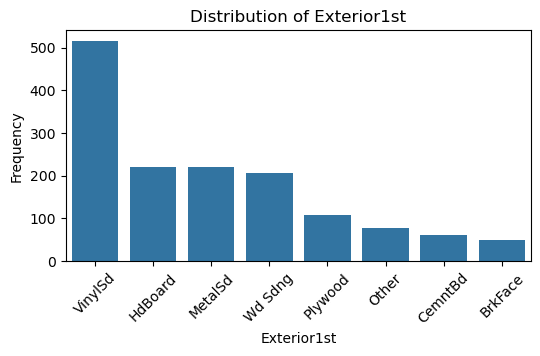

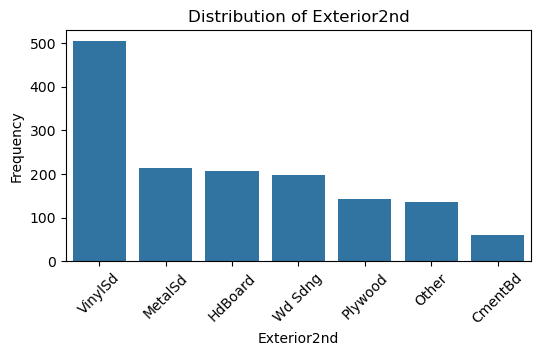

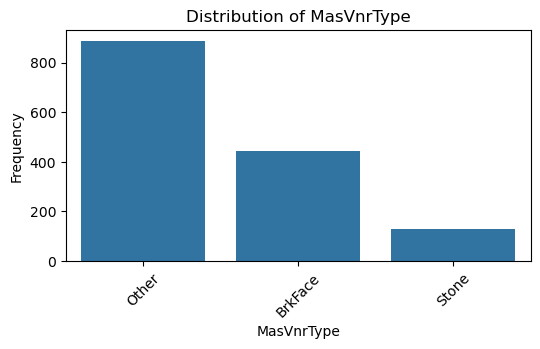

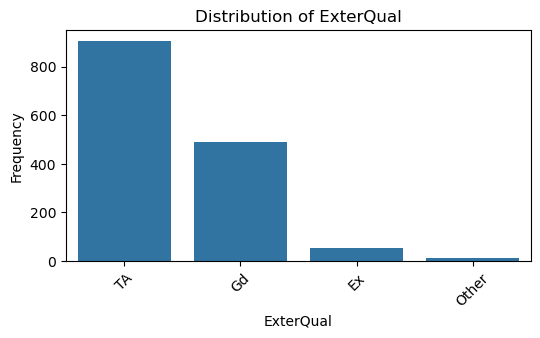

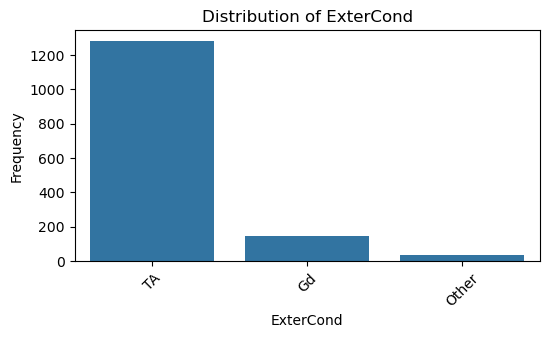

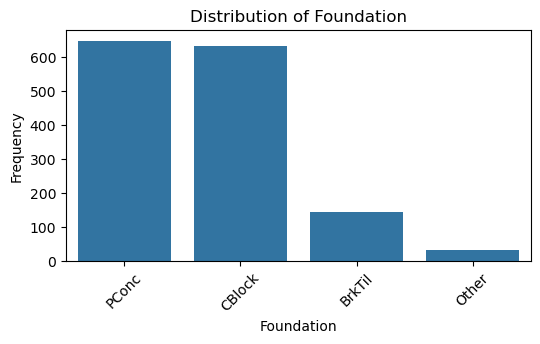

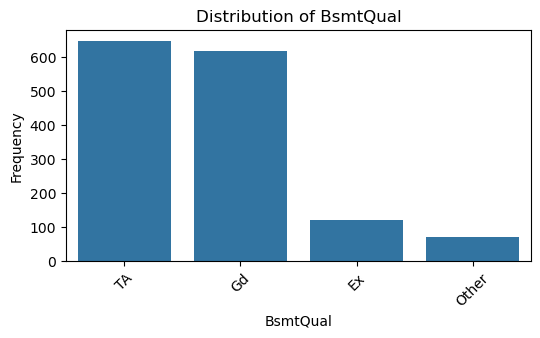

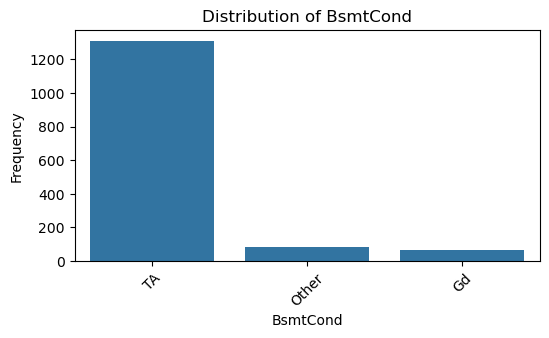

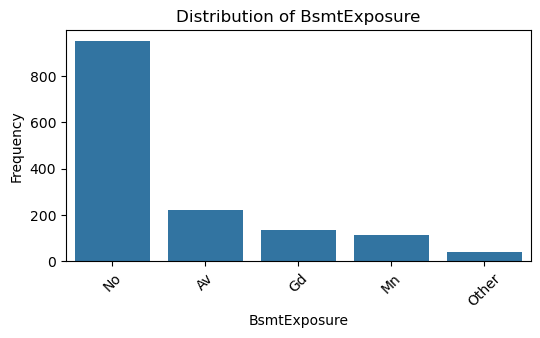

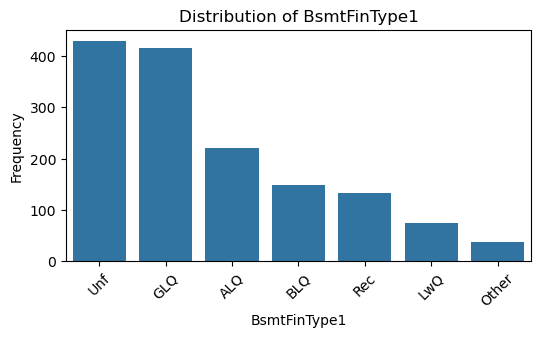

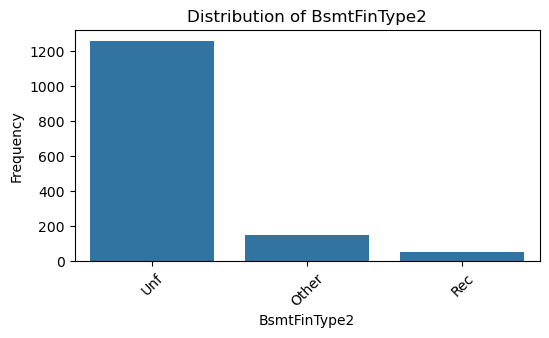

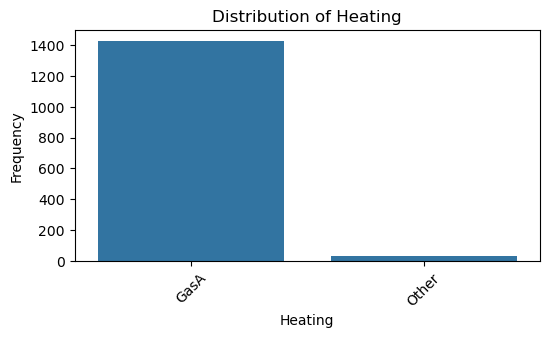

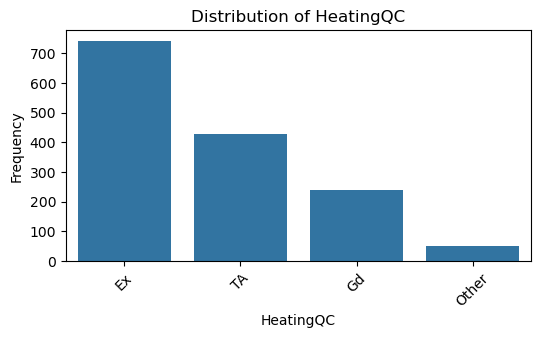

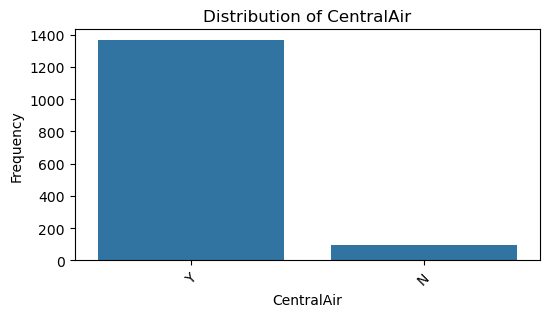

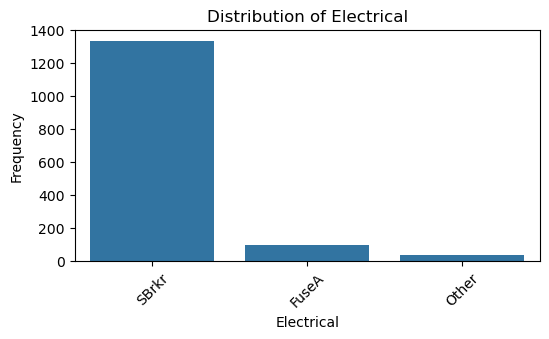

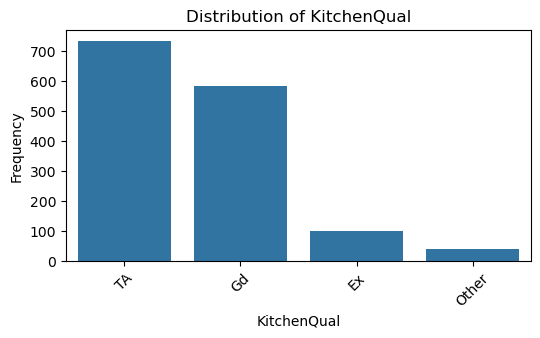

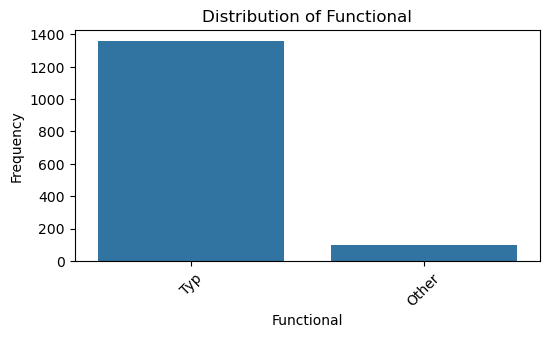

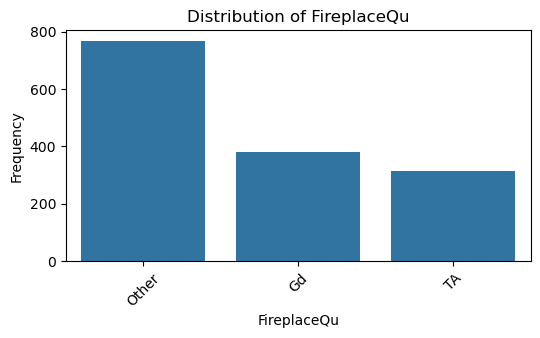

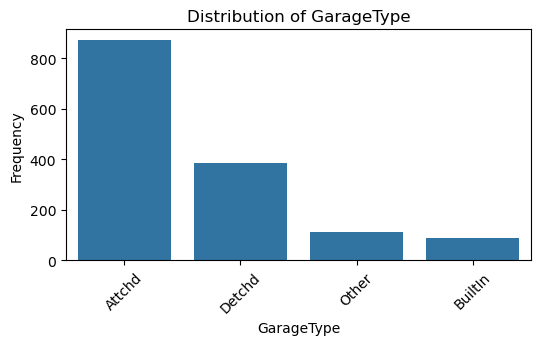

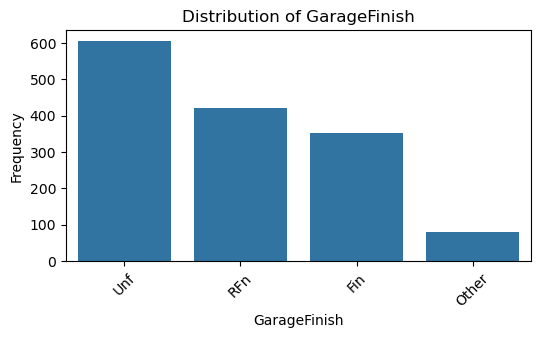

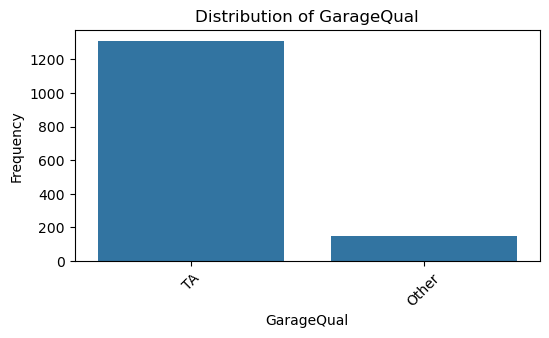

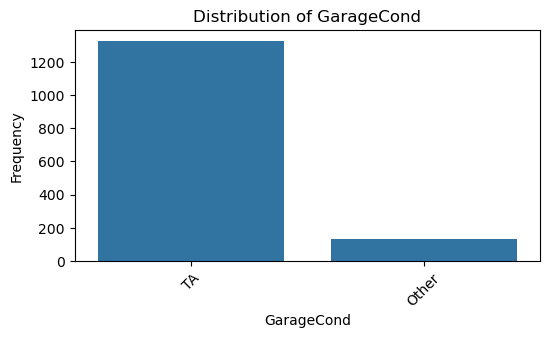

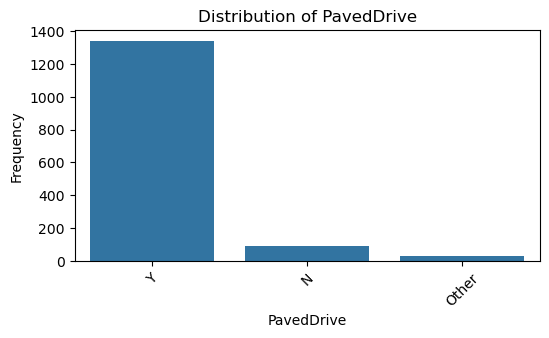

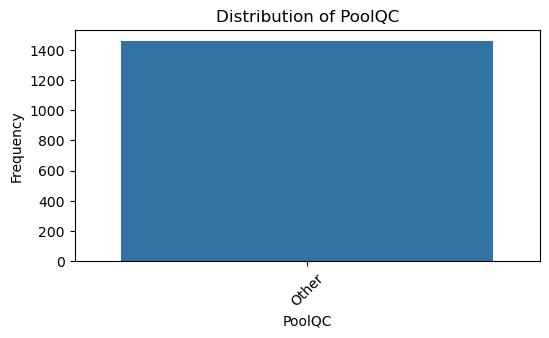

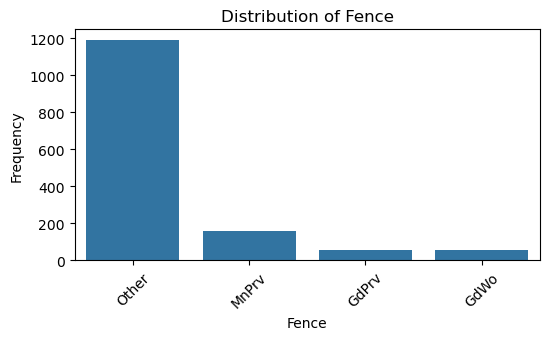

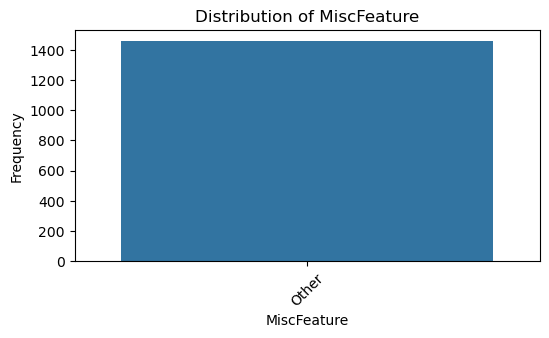

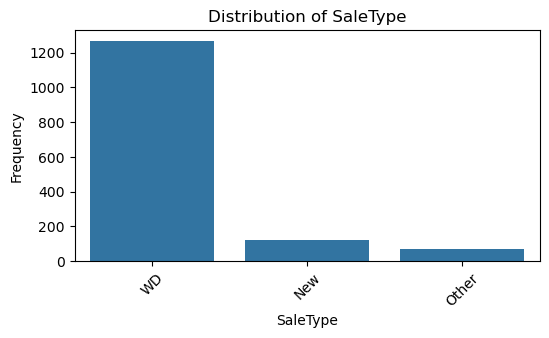

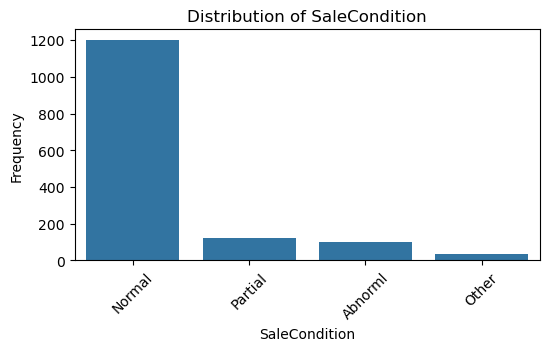

In [14]:
for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=df_train[col], order=df_train[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

### Correlation

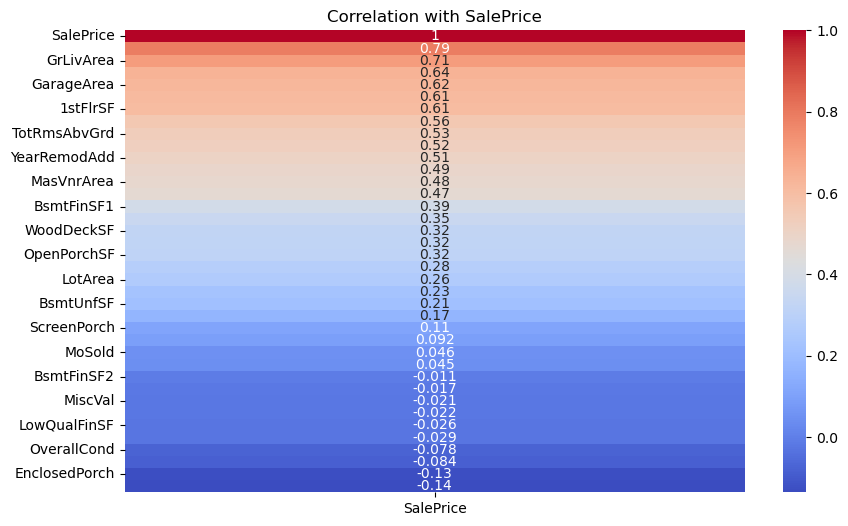

In [15]:
correlation = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with SalePrice')
plt.show()

<Axes: >

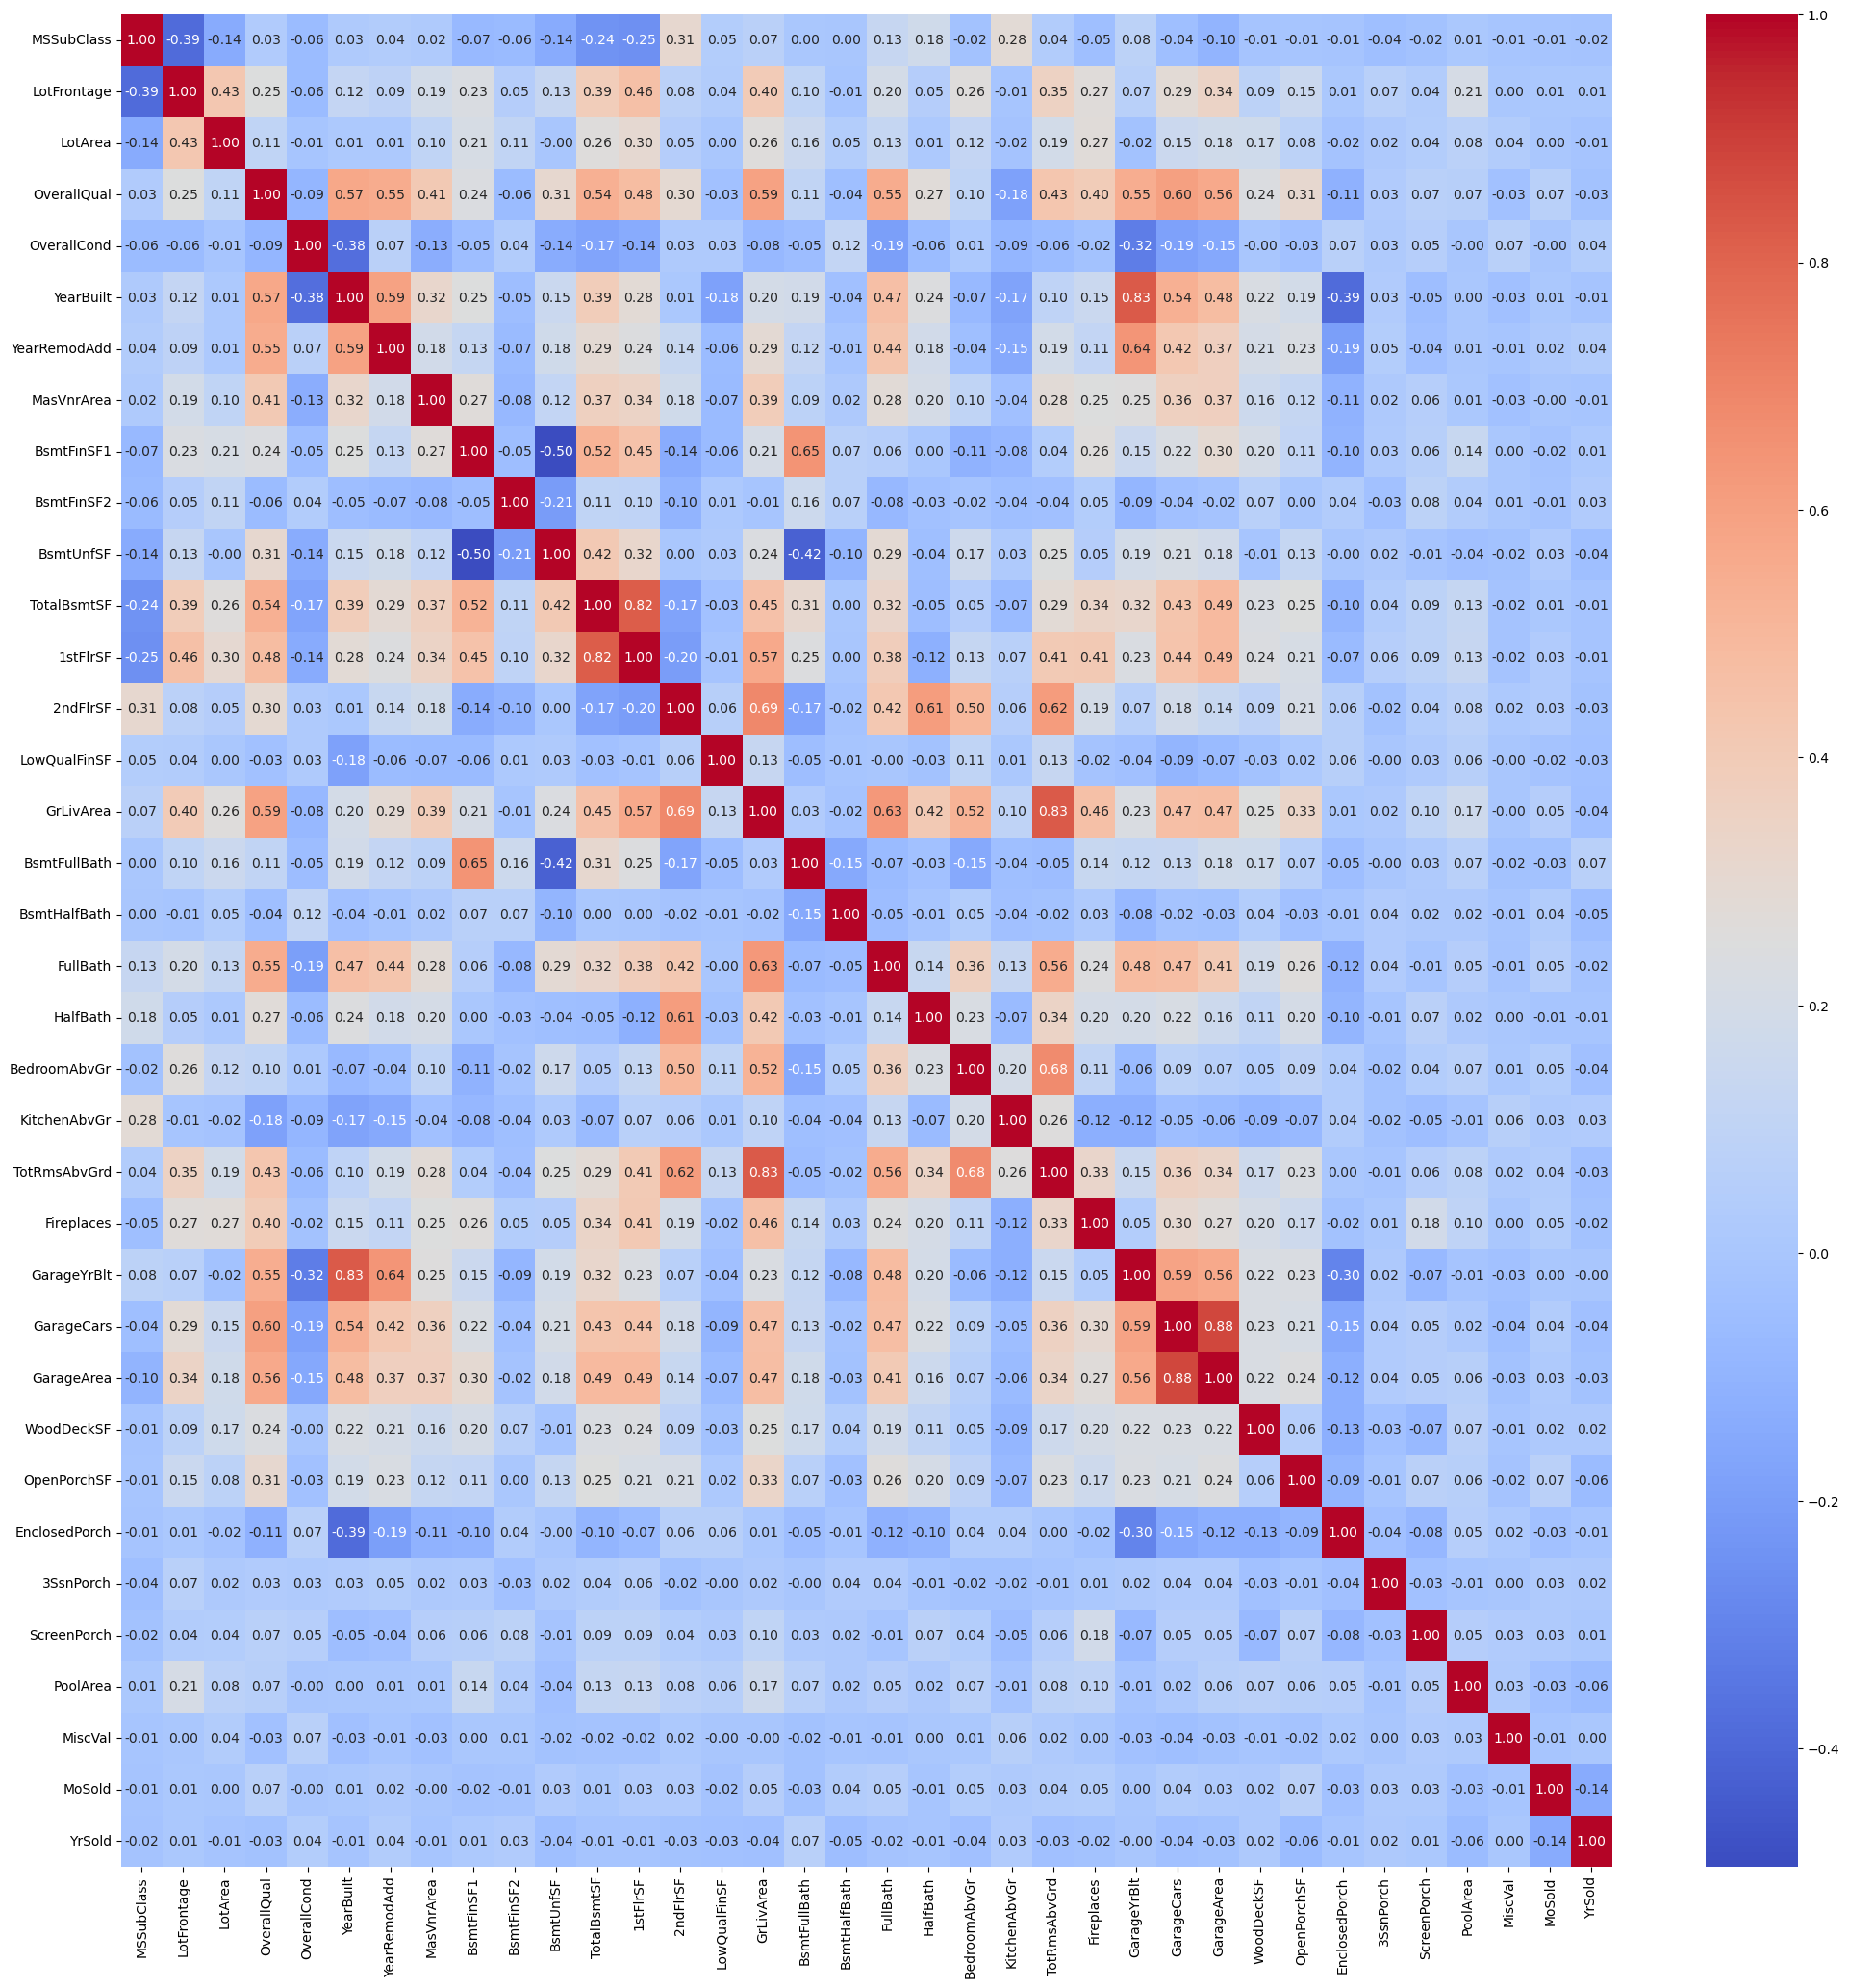

In [16]:
df_correlation = df_train.copy()
df_correlation = df_correlation.drop(['Id', 'SalePrice'], axis = 1)

corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Target variable
Our target value in this dataset is price - 'SalePrice', which is not well distributed

In [17]:
df_train['SalePrice'].value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
110000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

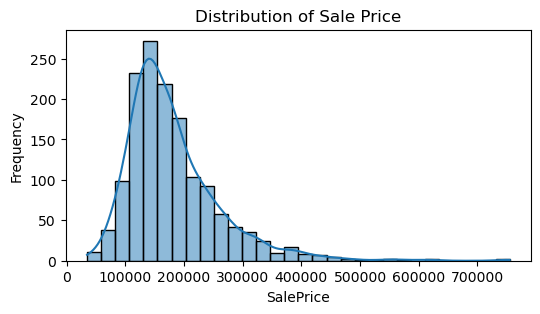

In [18]:
plt.figure(figsize=(6, 3))
sns.histplot(df_train['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Price')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### Data split into train and validation sets

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# check that all categories in validation are in train
def validate_categories(X_train, X_validation, categorical_columns):
    for col in categorical_columns:
        train_categories = set(X_train[col].unique())
        validation_categories = set(X_validation[col].unique())
        
        unknown_categories = validation_categories - train_categories
        if unknown_categories:
            print(f"In column '{col}' found categories that are not in train: {unknown_categories}")

In [21]:
y = df_train['SalePrice']
X = df_train.drop(columns=['SalePrice'])

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)

In [22]:
validation = validate_categories(X_train, X_validation, categorical_columns)

### Data preprocessing
- Handling missing values (LotFrontage - replacing missing values with the median, as the distribution is assymetric. The median is robust to outliers and better reflects the "central" tendency in the data than the mean if there are extreme values)
- For the variable GarageYrBlt (year of garage construction), missing values ​​are likely to be due to houses that do not have a garage. In such cases, we can replace missing values with 0.

In [23]:
median_value = X_train['LotFrontage'].median()

X_train['LotFrontage'].fillna(median_value, inplace=True)
X_validation['LotFrontage'].fillna(median_value, inplace=True)

print(f"Check missing values in the variable: {X_train['LotFrontage'].isnull().sum()}")

Check missing values in the variable: 0


In [24]:
X_train['GarageYrBlt'].fillna(0, inplace=True)
X_validation['GarageYrBlt'].fillna(0, inplace=True)

print(f"Check missing values in the variable: {X_train['GarageYrBlt'].isnull().sum()}")

Check missing values in the variable: 0


In [25]:
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(X_train['MasVnrArea'].median())
X_validation['MasVnrArea'] = X_validation['MasVnrArea'].fillna(X_validation['MasVnrArea'].median())

Drop features with low correlation with target variable

In [26]:
correlation_saleprice = correlation['SalePrice'].sort_values(ascending=False)

# show cols with low correlation
low_correlation = correlation_saleprice[abs(correlation_saleprice) < 0.1]
print("Variables with low correlation with the target variable:\n", low_correlation)

low_correlation_columns = low_correlation.index

# drop columns with low correlation
X_train.drop(columns=low_correlation_columns, inplace=True)
X_validation.drop(columns=low_correlation_columns, inplace=True)

Variables with low correlation with the target variable:
 PoolArea        0.092404
MoSold          0.046432
3SsnPorch       0.044584
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
MiscVal        -0.021190
Id             -0.021917
LowQualFinSF   -0.025606
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


### Categorical columns encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()

# Applying label encoding to categorical Variables with Order
ordered_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in ordered_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col].astype(str))
    X_validation[col] = label_encoder.transform(X_validation[col].astype(str))

In [28]:
# One-Hot Encoding

columns_for_onehot = [col for col in categorical_columns if col not in ordered_columns]

# Convert to string data type
for col in columns_for_onehot:
    X_train[col] = X_train[col].astype(str)
    X_validation[col] = X_validation[col].astype(str)

X_train = pd.get_dummies(X_train, columns=columns_for_onehot, drop_first=True)
X_validation = pd.get_dummies(X_validation, columns=columns_for_onehot, drop_first=True)


In [29]:
# Convert bool columns to 0/1

bool_columns = X_train.select_dtypes(include=['bool']).columns
X_train[bool_columns] = X_train[bool_columns].astype(int)

bool_columns_val = X_validation.select_dtypes(include=['bool']).columns
X_validation[bool_columns_val] = X_validation[bool_columns_val].astype(int)

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 788 to 290
Columns: 130 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(127)
memory usage: 1.2 MB


In [31]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 1419 to 223
Columns: 129 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(126)
memory usage: 296.6 KB


In [32]:
X_train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,...,PavedDrive_Other,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_Other,SaleType_Other,SaleType_WD,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial
788,50.0,6000,4,1954,2000,0.0,3,2,3,0,...,0,1,0,0,1,0,1,1,0,0
1421,53.0,4043,6,1977,1977,0.0,1,2,3,360,...,0,1,0,0,1,0,1,1,0,0
870,60.0,6600,5,1962,1962,0.0,3,2,3,0,...,0,1,0,0,1,0,1,1,0,0
579,81.0,12150,5,1954,1954,335.0,3,2,3,0,...,0,1,0,0,1,0,1,1,0,0
329,60.0,6402,5,1920,1950,0.0,3,2,2,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,69.0,7500,7,2000,2000,0.0,1,2,3,533,...,0,1,0,0,1,0,1,1,0,0
1385,40.0,5436,4,1922,2007,0.0,3,2,3,735,...,0,0,0,1,0,0,1,1,0,0
1369,48.0,10635,8,2003,2003,171.0,1,2,0,370,...,0,1,0,0,1,0,1,1,0,0
419,65.0,8450,5,1968,1968,0.0,3,2,3,775,...,0,1,0,0,1,0,1,1,0,0


### StandartScaler for Target variable
to transform the scale of the target variable

In [33]:
scaler_y = StandardScaler()

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_train_scaled = pd.Series(y_train_scaled.flatten(), index=y_train.index)

y_validation_scaled = scaler_y.transform(y_validation.values.reshape(-1, 1))
y_validation_scaled = pd.Series(y_validation_scaled.flatten(), index=y_validation.index)

print(y_train_scaled.head())

788    -0.915426
1421   -0.669861
870    -0.895380
579    -0.619746
329    -1.290037
dtype: float64


# Decision Tree from scratch

First I want to reduce the dataset so I can check the code faster

In [34]:
# choose only some features
selected_columns = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt']
df_reduced_train = X_train[selected_columns]
df_reduced_validation = X_validation[selected_columns]

In [35]:
df_reduced_validation

,LotFrontage,LotArea,OverallQual,YearBuilt
1419,69.0,16381,6,1969
144,70.0,9100,5,1963
64,69.0,9375,7,1997
204,50.0,3500,5,1947
957,70.0,7420,5,1962
...,...,...,...,...
194,60.0,7180,5,1972
169,69.0,16669,8,1981
1137,54.0,6342,5,1875
1012,55.0,10592,6,1923


In [36]:
# calculate MSE for predictions

def mse_for_pred(true, pred):
    return np.mean(np.square(true - pred))

In [37]:
# When we compare the MSE from before and after a split we get whats called information gain

def information_gain(y_root, y_left, y_right):
    
    n = len(y_root)
    n_left, n_right = len(y_left), len(y_right)
    
    mse_root = calculate_mse(y_root)
    mse_left = calculate_mse(y_left)
    mse_right = calculate_mse(y_right)
    
    ig = mse_root - (n_left / n) * mse_left - (n_right / n) * mse_right
    return ig


In [38]:
def find_all_splits(X):

    n_samples, n_features = X.shape
    splits = []

    for feature_index in range(n_features):
        # Get unique values ​​for the feature and sort them
        unique_values = np.unique(X.iloc[:, feature_index])
        
        # Exclude the last value (otherwise the right selection will be empty)
        for i in range(len(unique_values) - 1):
            threshold = unique_values[i]
            
            left_indices = X.iloc[:, feature_index] <= threshold
            right_indices = ~left_indices
            
            splits.append({
                'feature_index': feature_index,
                'threshold': threshold,
                'left_indices': np.where(left_indices)[0],
                'right_indices': np.where(right_indices)[0] 
            })
    
    return splits


In [39]:
# let's find the best split, where y - target variable

def find_best_split(X, y):
    n_samples, n_features = X.shape
    best_split = None
    best_info_gain = 0

    splits = find_all_splits(X)

    y_root = y

    for split in splits:
        left_indices = split['left_indices']
        right_indices = split['right_indices']
        
        y_left = y.iloc[left_indices]
        y_right = y.iloc[right_indices]  

        ig = information_gain(y_root, y_left, y_right)

        if ig > best_info_gain:
            best_info_gain = ig
            best_split = split

    return best_split

In [40]:
# so we found the best split, now we repeat the division into splits on the left and right side and find the best split. 
# We stop the division in the branch when mse is zero

# calculate MSE to evaluate splits
def calculate_mse(true):
    return np.mean(np.square(true - np.mean(true)))

def build_tree(X, y, depth=0, max_depth=None):

    if len(np.unique(y)) == 1 or calculate_mse(y) == 0: 
        return {'value': np.mean(y)} 
        
    if max_depth is not None and depth >= max_depth:
        return {'value': np.mean(y)}

    best_split = find_best_split(X, y)
    
    if best_split is None:
        return {'value': np.mean(y)}

# Recursively build a tree for the left and right parts
    
    left_tree = build_tree(X.iloc[best_split['left_indices']], y.iloc[best_split['left_indices']], depth + 1, max_depth)
    right_tree = build_tree(X.iloc[best_split['right_indices']], y.iloc[best_split['right_indices']], depth + 1, max_depth)

    
    return {
        'feature_index': best_split['feature_index'],
        'threshold': best_split['threshold'],
        'left': left_tree,
        'right': right_tree
    }

In [41]:
# build the prediction function

def predict(tree, X):
    
    predictions = []
    
    for i in range(X.shape[0]): 
        x = X.iloc[i]
        node = tree
        while 'value' not in node:  
            feature_value = x.iloc[node['feature_index']]
            if feature_value <= node['threshold']:
                node = node['left']
            else:
                node = node['right']
        predictions.append(node['value'])
    
    return np.array(predictions)

In [42]:
tree = build_tree(df_reduced_train, y_train_scaled, max_depth=None)

In [43]:
# make a prediction 

y_train_pred = predict(tree, pd.DataFrame(df_reduced_train))
y_validation_pred = predict(tree, pd.DataFrame(df_reduced_validation))

mse_train = mse_for_pred(y_train_scaled, y_train_pred)
mse_validation = mse_for_pred(y_validation_scaled, y_validation_pred)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Validation): {mse_validation}")


MSE (Train): 0.0008156992791104707
MSE (Validation): 0.5122641903592289


### DecisionTreeRegressor from library

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [45]:
model = DecisionTreeRegressor(max_depth=None) 
model.fit(df_reduced_train, y_train_scaled)

DecisionTreeRegressor()

In [46]:
y_train_pred = model.predict(df_reduced_train)
y_validation_pred = model.predict(df_reduced_validation)

mse_train = mean_squared_error(y_train_scaled, y_train_pred)
mse_validation = mean_squared_error(y_validation_scaled, y_validation_pred)


print(f"MSE (Train): {mse_train}")
print(f"MSE (Validation): {mse_validation}")


MSE (Train): 0.0008156992791104707
MSE (Validation): 0.47674399354598695


### RandomForest from scratch

In [47]:
# generate N bootstrap to find the split at a node

def get_bootstrap(X, y, N):
    n_samples = X.shape[0]
    bootstrap = []
    
    for i in range(N):
        sample_index = np.random.randint(0, n_samples, size = n_samples)
        b_X = X.iloc[sample_index]  # Use .iloc for DataFrame
        b_y = y.iloc[sample_index]
        
        bootstrap.append((b_X, b_y))
        
    return bootstrap

In [48]:
def random_forest(X, y, n_trees):
    forest = []
    bootstrap = get_bootstrap(X, y, n_trees)
    
    for b_X, b_y in bootstrap:
        forest.append(build_tree(b_X, b_y))

    return forest

In [49]:
def predict_forest(forest, X):
    predictions = []
    for tree in forest:
        predictions.append(predict(tree, X))


    predictions_array = np.array(predictions)  # size (n_trees, n_samples)
    averaged_predictions = np.mean(predictions_array, axis=0)  # size: (n_samples,)

    
    return np.array(averaged_predictions)

In [50]:
%%time

n_trees = 2
my_forest = random_forest(df_reduced_train, y_train_scaled, n_trees)

CPU times: user 14.8 s, sys: 241 ms, total: 15.1 s
Wall time: 15.1 s


In [51]:
y_train_pred = predict_forest(my_forest, df_reduced_train)
y_validation_pred = predict_forest(my_forest, df_reduced_validation)

mse_train = mse_for_pred(y_train_scaled, y_train_pred)
mse_validation = mse_for_pred(y_validation_scaled, y_validation_pred)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Validation): {mse_validation}")

MSE (Train): 0.0814759100556796
MSE (Validation): 0.4219704639673103


### RandomForest from library

In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=2, max_depth=None)
model.fit(df_reduced_train, y_train_scaled)
y_train_pred = model.predict(df_reduced_train)
y_validation_pred = model.predict(df_reduced_validation)

In [59]:
mse_train = mean_squared_error(y_train_scaled, y_train_pred)
mse_validation = mean_squared_error(y_validation_scaled, y_validation_pred)

print(f"MSE (Train): {mse_train}")
print(f"MSE (Validation): {mse_validation}")

MSE (Train): 0.08320294311935238
MSE (Validation): 0.44760134405342583
